Importing the libraries and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Data exploration

In [2]:
data = pd.read_csv("E:\medicalinsurance_Project\insurance_dataset.csv") 

In [3]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.88,2.0,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.89,0.0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     960000 non-null   float64
 1   gender                  976000 non-null   object 
 2   bmi                     1000000 non-null  float64
 3   children                968000 non-null   float64
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              968000 non-null   object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(4), object(8)
memory usage: 91.6+ MB


In [5]:
data.shape

(1000000, 12)

In [6]:
data.select_dtypes(include = 'object').columns
     

Index(['gender', 'smoker', 'region', 'medical_history',
       'family_medical_history', 'exercise_frequency', 'occupation',
       'coverage_level'],
      dtype='object')

In [7]:
data.select_dtypes(include = ['int64','float64']).columns
     

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [8]:
#statistical summary
data.describe()

,age,bmi,children,charges
count,960000.000000,1000000.000000,968000.000000,1000000.000000
mean,41.493661,34.001839,2.499985,16735.117481
std,13.855738,9.231680,1.707749,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,30.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


dealing with missing value

In [9]:
data.isnull().sum()

age                        40000
gender                     24000
bmi                            0
children                   32000
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                 32000
coverage_level                 0
charges                        0
dtype: int64

In [10]:
data.dropna(inplace= True)

In [11]:
data.shape

(509576, 12)

In [12]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [13]:
data["gender"].replace(['female', 'male'],[0,1],inplace=True)

In [14]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [15]:
data["smoker"].replace(['yes', 'no'],[1,0],inplace=True)

In [16]:
data["region"].unique()

array(['northwest', 'northeast', 'southeast', 'southwest'], dtype=object)

In [17]:
data["region"].replace(['southeast', 'southwest','northeast','northwest'],[0,1,2,3],inplace=True)

In [18]:
data["medical_history"].unique()

array(['Diabetes', 'High blood pressure', 'Heart disease'], dtype=object)

In [19]:
data["medical_history"].replace(['Heart disease','Diabetes','High blood pressure'],[0,1,2],inplace=True)

In [20]:
data["family_medical_history"].unique()

array(['High blood pressure', 'Diabetes', 'Heart disease'], dtype=object)

In [21]:
data["family_medical_history"].replace(['Heart disease','Diabetes','High blood pressure'],[0,1,2],inplace=True)

In [22]:
data["exercise_frequency"].unique()

array(['Occasionally', 'Rarely', 'Never', 'Frequently'], dtype=object)

In [23]:
data["exercise_frequency"].replace(['Occasionally', 'Rarely', 'Never', 'Frequently'],[0,1,2,3],inplace= True)

In [24]:
data["coverage_level"].unique()

array(['Premium', 'Standard', 'Basic'], dtype=object)

In [25]:
data["coverage_level"].replace(['Premium', 'Standard', 'Basic'],[0,1,2],inplace= True)

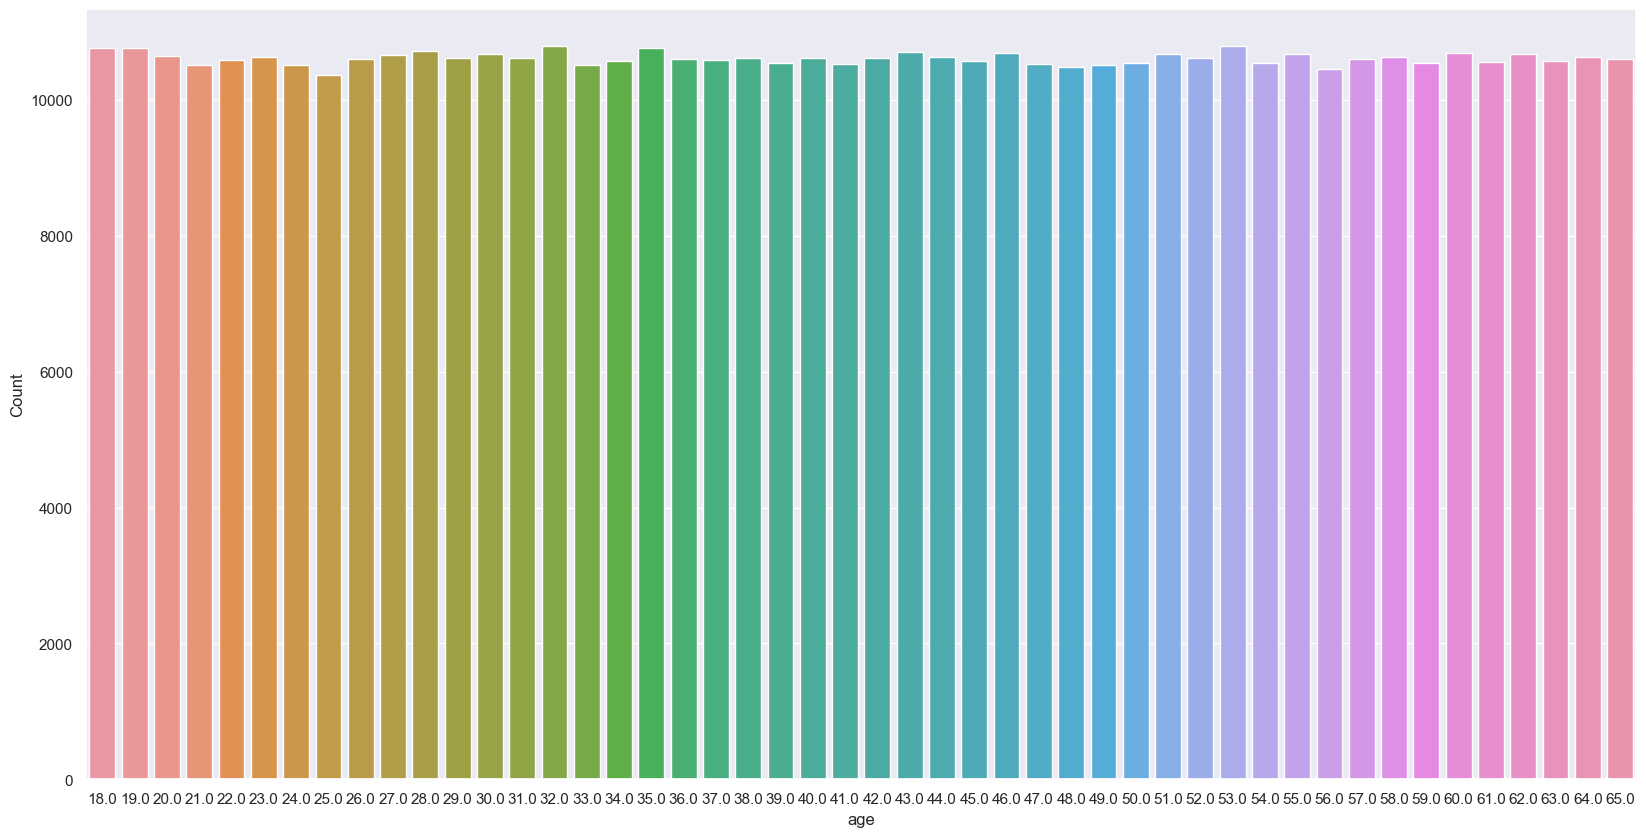

In [43]:
#data distribution for numerical column -age
plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=data)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

<Figure size 1000x1000 with 0 Axes>

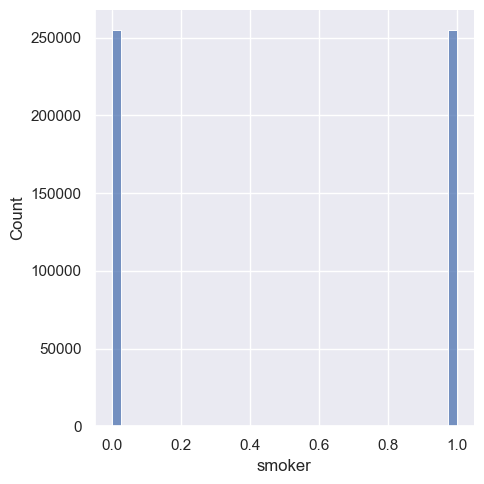

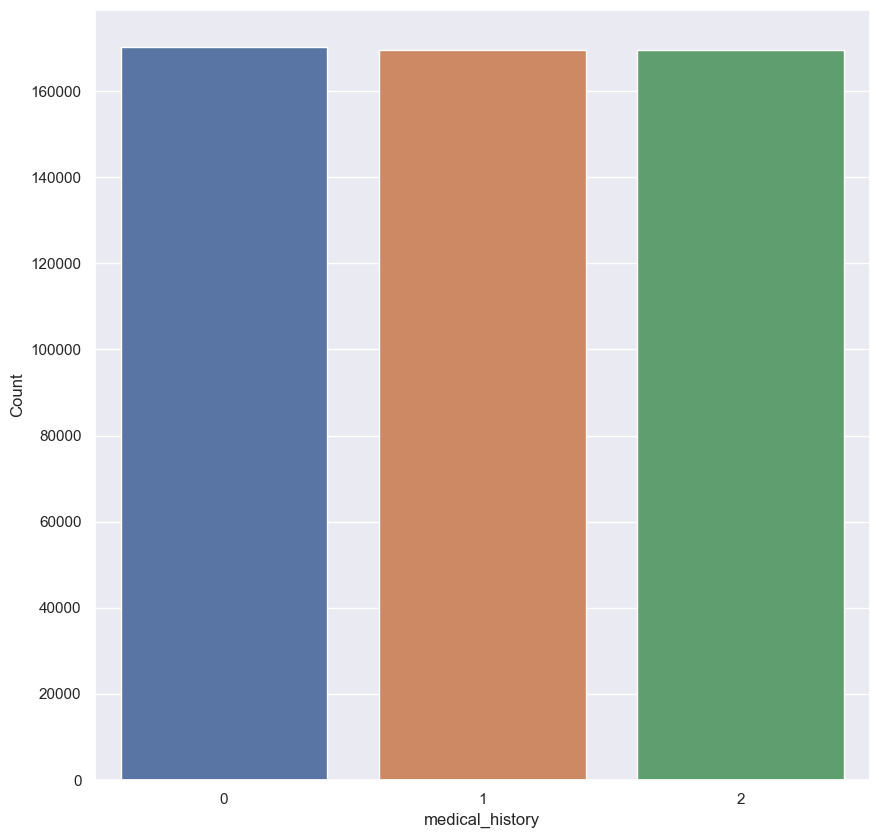

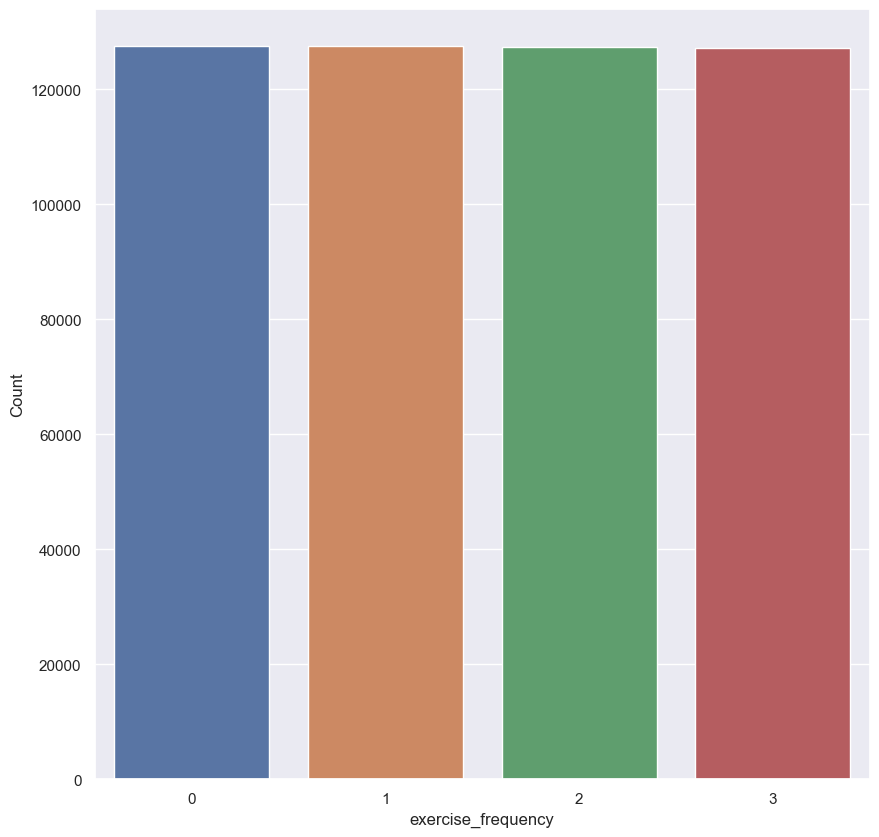

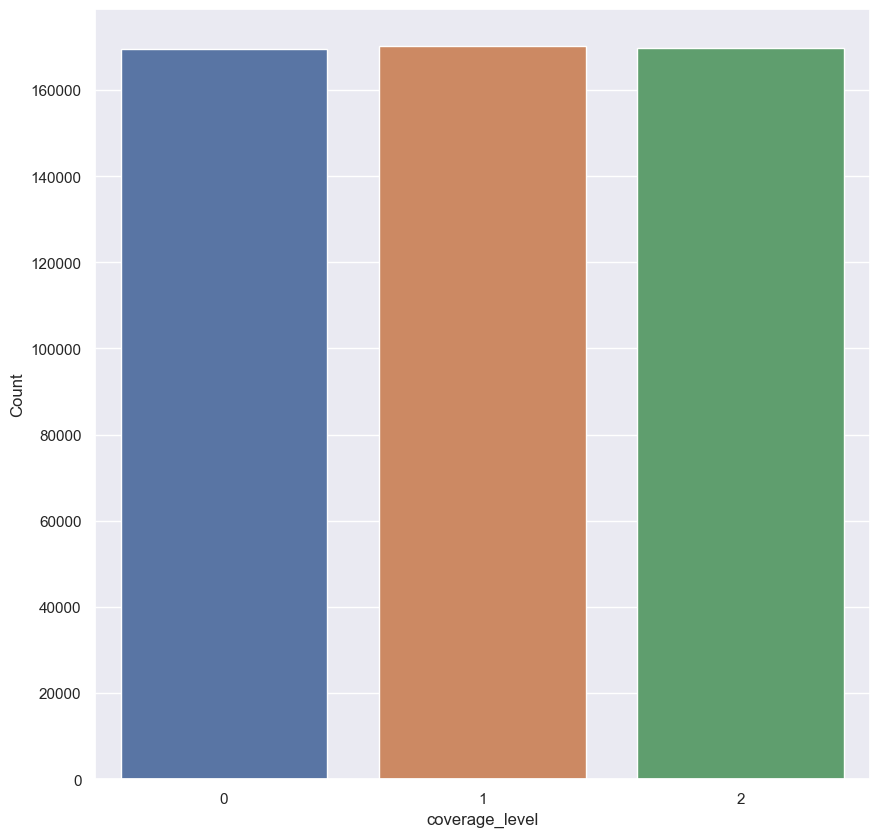

In [54]:
sns.set()
plt.figure(figsize=(10, 10))
sns.displot(x='smoker', data=data)
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()


sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='medical_history', data=data)
plt.xlabel('medical_history')
plt.ylabel('Count')
plt.show()

sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='exercise_frequency', data=data)
plt.xlabel('exercise_frequency')
plt.ylabel('Count')
plt.show()

sns.set()
plt.figure(figsize=(10, 10))
sns.countplot(x='coverage_level', data=data)
plt.xlabel('coverage_level')
plt.ylabel('Count')
plt.show()


Encoding the categorial data

In [26]:
data.drop(['occupation'],axis=1,inplace= True)

In [27]:
#Heatmap
corr = data.corr()

<Axes: >

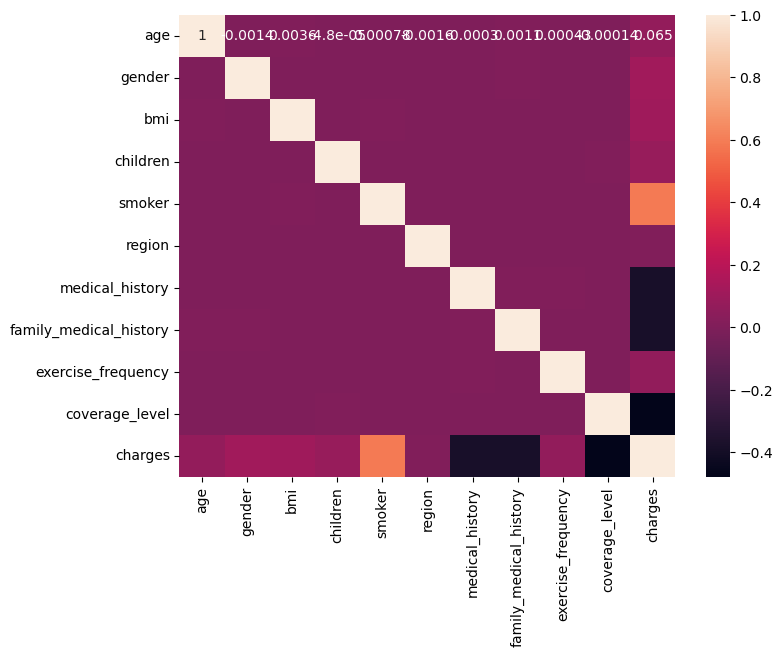

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True)

In [29]:
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,coverage_level,charges
1,25.0,0,25.38,2.0,1,3,1,2,0,0,20390.899218
4,49.0,1,38.21,3.0,1,3,1,2,1,1,19268.309838
6,64.0,0,20.12,2.0,0,2,2,2,2,2,9563.655011
7,53.0,1,30.51,4.0,0,0,0,2,1,1,15845.293730
11,45.0,0,39.68,1.0,0,3,2,2,0,0,14892.145930


Splitting the dataset

In [30]:
x = data.drop(columns='charges')
y= data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
     

In [31]:
x_train.shape
     

(407660, 10)

In [32]:
y_train.shape

(407660,)

In [33]:
x_test.shape

(101916, 10)

Feature scalling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[-1.40524345e+00, -1.00110938e+00,  1.22144551e+00, ...,
         1.22541074e+00, -1.33899905e+00,  1.22581924e+00],
       [ 1.19228347e+00,  9.98891847e-01,  3.48473694e-01, ...,
         9.19134647e-04,  1.34481004e+00,  1.22581924e+00],
       [-1.40524345e+00, -1.00110938e+00, -5.86234343e-01, ...,
         9.19134647e-04, -4.44396019e-01, -1.22536828e+00],
       ...,
       [ 2.54287636e-01, -1.00110938e+00, -1.43971051e+00, ...,
         9.19134647e-04, -1.33899905e+00,  1.22581924e+00],
       [-1.69385755e+00,  9.98891847e-01,  2.25001253e-01, ...,
         1.22541074e+00, -4.44396019e-01, -1.22536828e+00],
       [ 1.55305109e+00, -1.00110938e+00,  2.34749078e-01, ...,
        -1.22357247e+00, -4.44396019e-01, -1.22536828e+00]])

 Fit and evaluate the model

In [36]:
Random_lr = RandomForestRegressor(n_estimators = 100, max_depth=7)
Random_lr.fit(x_train,y_train)

RandomForestRegressor(max_depth=7)

In [37]:
y_pred = Random_lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9172653374576869

In [38]:
import pickle as pkl

In [39]:
pkl.dump(Random_lr,open('MIPML.pkl','wb'))